In [1]:
!pip install mne 

In [ ]:
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew , variation
from scipy.signal import welch
import pandas as pd
from scipy.signal import hilbert
from collections import Counter
import os
import glob
from scipy.fft import fft, fftfreq
from scipy.io import loadmat
from scipy import signal

In [3]:
%matplotlib qt

In [7]:
os.chdir('C:/Users/dasha/Documents/Neurobiology_EEG/VFT/MEG/')# прописываем путь

In [8]:
# Находим файлы в папке
filenames = glob.glob('*run1_raw_tsss_mc.fif')
filenames

['MG023_vft_run1_raw_tsss_mc.fif',
 'MG024_vft_run1_raw_tsss_mc.fif',
 'MG025_vft_run1_raw_tsss_mc.fif',
 'MG026_vft_run1_raw_tsss_mc.fif',
 'MG027_vft_run1_raw_tsss_mc.fif',
 'MG028_vft_run1_raw_tsss_mc.fif',
 'MG029_vft_run1_raw_tsss_mc.fif',
 'MG030_vft_run1_raw_tsss_mc.fif',
 'MG031_vft_run1_raw_tsss_mc.fif',
 'MG032_vft_run1_raw_tsss_mc.fif']

In [9]:
#Подгружаем сырые файлы
MEG = []

for i in range (len(filenames)):  
    #name= f'{ID[i]}_VFT.vhdr'
    name=filenames[i]
    E = mne.io.read_raw_fif(name, verbose=False, preload=True)
    MEG.append(E)

C:\Users\dasha\AppData\Local\Temp/ipykernel_10056/3830230136.py:7: RuntimeWarning: This filename (MG023_vft_run1_raw_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  E = mne.io.read_raw_fif(name, verbose=False, preload=True)
C:\Users\dasha\AppData\Local\Temp/ipykernel_10056/3830230136.py:7: RuntimeWarning: This filename (MG024_vft_run1_raw_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  E = mne.io.read_raw_fif(name, verbose=False, preload=True)
C:\Users\dasha\AppData\Local\Temp/ipykernel_10056/3830230136.py:7: RuntimeWarning: This filename (MG025_vft_run1_raw_tsss_mc.fif) does not conform to MNE naming con

In [36]:
#Фильтрация файлов 
for i in range (0, len(MEG)):
    #MEG[i]=MEG[i].drop_channels(MEG[i].ch_names[-1])  
    MEG[i]=MEG[i].filter(0.1, 100, phase='zero-double')
    MEG[i]=MEG[i].copy().notch_filter(50, picks=None, filter_length='auto', 
                                       notch_widths=None, trans_bandwidth=1.0, n_jobs=None, method='fir', 
                                       iir_params=None, mt_bandwidth=None, p_value=0.05, phase='zero-double', 
                                       fir_window='hamming', fir_design='firwin', 
                                       pad='reflect_limited', 
                                       skip_by_annotation=('edge', 'bad_acq_skip'), verbose=None)
   # MEG[i].plot(start=0)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-12 dB cutoff frequency: 112.50 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   17.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   29.8s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    7.7s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-12 dB cutoff frequency: 112.50 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    9.4s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   16.7s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    6.8s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-12 dB cutoff frequency: 112.50 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   18.4s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   31.2s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.9s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-12 dB cutoff frequency: 112.50 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   14.2s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   25.7s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    6.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-12 dB cutoff frequency: 112.50 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   14.4s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   26.8s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.8s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-12 dB cutoff frequency: 112.50 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   28.1s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    6.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-12 dB cutoff frequency: 112.50 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   27.8s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    7.6s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-12 dB cutoff frequency: 112.50 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   14.6s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   26.2s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    7.8s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-12 dB cutoff frequency: 112.50 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   14.5s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   25.9s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.9s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-12 dB cutoff frequency: 112.50 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   14.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   25.6s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    6.0s


In [13]:
MEG # Cмотрим что за файлы, ображаем внемание на тайминги

[<Raw | MG023_vft_run1_raw_tsss_mc.fif, 336 x 148000 (148.0 s), ~384.6 MB, data loaded>,
 <Raw | MG024_vft_run1_raw_tsss_mc.fif, 336 x 130000 (130.0 s), ~338.4 MB, data loaded>,
 <Raw | MG025_vft_run1_raw_tsss_mc.fif, 336 x 141000 (141.0 s), ~366.6 MB, data loaded>,
 <Raw | MG026_vft_run1_raw_tsss_mc.fif, 336 x 134000 (134.0 s), ~348.7 MB, data loaded>,
 <Raw | MG027_vft_run1_raw_tsss_mc.fif, 336 x 135000 (135.0 s), ~351.3 MB, data loaded>,
 <Raw | MG028_vft_run1_raw_tsss_mc.fif, 336 x 140000 (140.0 s), ~364.1 MB, data loaded>,
 <Raw | MG029_vft_run1_raw_tsss_mc.fif, 336 x 170000 (170.0 s), ~441.0 MB, data loaded>,
 <Raw | MG030_vft_run1_raw_tsss_mc.fif, 336 x 158000 (158.0 s), ~410.2 MB, data loaded>,
 <Raw | MG031_vft_run1_raw_tsss_mc.fif, 336 x 136000 (136.0 s), ~353.8 MB, data loaded>,
 <Raw | MG032_vft_run1_raw_tsss_mc.fif, 336 x 138000 (138.0 s), ~358.9 MB, data loaded>]

In [37]:
# Обризаем файлы так как меток нет, то к сожалению приблизительно. 
# Продолжительность стимуляции должна быть 120 секунд
eplist=[]
for i in range (0, len(MEG)):
    ep = MEG[i].copy().crop(tmin=3, tmax=123) #Приблизительно нарезаем от 3 до 123 секунд
    eplist.append(ep)

In [38]:
#Разделяем магнитометры и градиометры
mag_list=[]#список файлов с магнитометрами
grad_list=[]#список фойлов с градиометрами
for i in range (0, len(MEG)):
    mag_list.append(eplist[i].copy().pick('mag'))
    grad_list.append(eplist[i].copy().pick('grad'))

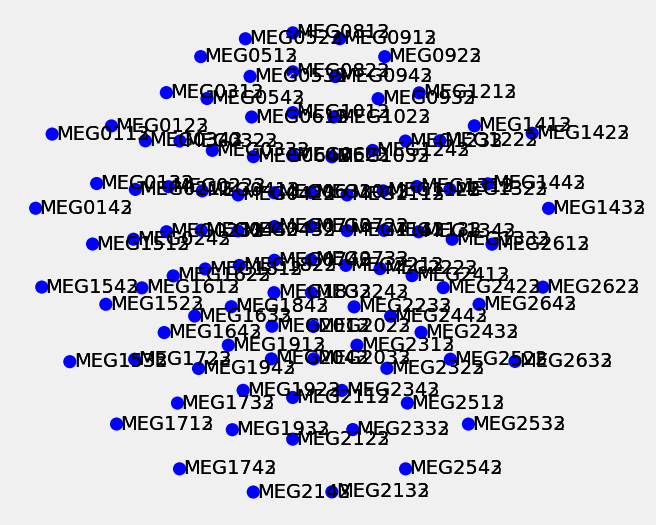

In [110]:
#Можно попробовать отристовать сенсоры
mne.viz.plot_sensors(mag_list[0].info, kind='topomap',
                     ch_type='grad',  show_names=True, 
                     to_sphere=True, axes=None, block=False, show=True, 
                     sphere=None, verbose=None,
                    pointsize=110, linewidth=1)

In [16]:
#Создаем функцию для расчета SNR
def snr_spectrum(psd, noise_n_neighbor_freqs=1, noise_skip_neighbor_freqs=1):
    """Compute SNR spectrum from PSD spectrum using convolution.

    Parameters
    ----------
    psd : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Data object containing PSD values. Works with arrays as produced by
        MNE's PSD functions or channel/trial subsets.
    noise_n_neighbor_freqs : int
        Number of neighboring frequencies used to compute noise level.
        increment by one to add one frequency bin ON BOTH SIDES
    noise_skip_neighbor_freqs : int
        set this >=1 if you want to exclude the immediately neighboring
        frequency bins in noise level calculation

    Returns
    -------
    snr : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Array containing SNR for all epochs, channels, frequency bins.
        NaN for frequencies on the edges, that do not have enough neighbors on
        one side to calculate SNR.
    """
    # Construct a kernel that calculates the mean of the neighboring
    # frequencies
    averaging_kernel = np.concatenate(
        (
            np.ones(noise_n_neighbor_freqs),
            np.zeros(2 * noise_skip_neighbor_freqs + 1),
            np.ones(noise_n_neighbor_freqs),
        )
    )
    averaging_kernel /= averaging_kernel.sum()

    # Calculate the mean of the neighboring frequencies by convolving with the
    # averaging kernel.
    mean_noise = np.apply_along_axis(
        lambda psd_: np.convolve(psd_, averaging_kernel, mode="valid"), axis=-1, arr=psd
    )

    # The mean is not defined on the edges so we will pad it with nas. The
    # padding needs to be done for the last dimension only so we set it to
    # (0, 0) for the other ones.
    edge_width = noise_n_neighbor_freqs + noise_skip_neighbor_freqs
    pad_width = [(0, 0)] * (mean_noise.ndim - 1) + [(edge_width, edge_width)]
    mean_noise = np.pad(mean_noise, pad_width=pad_width, constant_values=np.nan)

    return psd / mean_noise

In [17]:
#Создаем функцию для расчета Z значений
def z_spectrum(psd, noise_n_neighborfreqs=1, noise_skip_neighborfreqs=1):
    """
    Parameters
    ----------
    psd - np.array
        containing psd values as spit out by mne functions. must be 2d or 3d
        with frequencies in the last dimension
    noise_n_neighborfreqs - int
        number of neighboring frequencies used to compute noise level.
        increment by one to add one frequency bin ON BOTH SIDES
    noise_skip_neighborfreqs - int
        set this >=1 if you want to exclude the immediately neighboring
        frequency bins in noise level calculation

    Returns
    -------
    snr - np.array
        array containing snr for all epochs, channels, frequency bins.
        NaN for frequencies on the edge, that do not have enoug neighbors on
        one side to calculate snr
    """

    # prep not epoched / single channel data
    is_2d = True if (len(psd.shape) == 2) else False
    if is_2d:
        psd = psd.reshape((1, psd.shape[0], psd.shape[1]))

    # SNR loop
    z_scr = np.empty(psd.shape)
    for i_freq in range(psd.shape[2]):

        # skip freqs on the edges (without noise neighbors)

        start_freq_i = noise_n_neighborfreqs + noise_skip_neighborfreqs
        stop_freq_i = (psd.shape[2] - noise_n_neighborfreqs
                       - noise_skip_neighborfreqs)
        if not (stop_freq_i > i_freq >= start_freq_i):
            z_scr[:, :, i_freq] = np.nan
            continue

        # extract signal level
        signal = psd[:, :, i_freq]

        # ... and average noise level
        i_noise = []
        for i in range(noise_n_neighborfreqs):
            i_noise.append(i_freq + noise_skip_neighborfreqs + i + 1)
            i_noise.append(i_freq - noise_skip_neighborfreqs - i - 1)
        noise_mean = psd[:, :, i_noise].mean(axis=2)
        noise_std = psd[:, :, i_noise].std(axis=2)

        z_scr[:, :, i_freq] = (signal - noise_mean) / noise_std

    # reshape not epoched / single channel data to original dimensions
    if is_2d:
        z_scr = z_scr.reshape(z_scr.shape[1], z_scr.shape[2])

    return z_scr

In [18]:
#Создаем функцию для расчета скоректированной амплитуды
def bas_cor(psd, noise_n_neighborfreqs=1, noise_skip_neighborfreqs=1):
    """
    Parameters
    ----------
    psd - np.array
        containing psd values as spit out by mne functions. must be 2d or 3d
        with frequencies in the last dimension
    noise_n_neighborfreqs - int
        number of neighboring frequencies used to compute noise level.
        increment by one to add one frequency bin ON BOTH SIDES
    noise_skip_neighborfreqs - int
        set this >=1 if you want to exclude the immediately neighboring
        frequency bins in noise level calculation

    Returns
    -------
    snr - np.array
        array containing snr for all epochs, channels, frequency bins.
        NaN for frequencies on the edge, that do not have enoug neighbors on
        one side to calculate snr
    """

    # prep not epoched / single channel data
    is_2d = True if (len(psd.shape) == 2) else False
    if is_2d:
        psd = psd.reshape((1, psd.shape[0], psd.shape[1]))

    # SNR loop
    bas_cor_spect = np.empty(psd.shape)
    for i_freq in range(psd.shape[2]):

        # skip freqs on the edges (without noise neighbors)

        start_freq_i = noise_n_neighborfreqs + noise_skip_neighborfreqs
        stop_freq_i = (psd.shape[2] - noise_n_neighborfreqs
                       - noise_skip_neighborfreqs)
        if not (stop_freq_i > i_freq >= start_freq_i):
            bas_cor_spect[:, :, i_freq] = np.nan
            continue

        # extract signal level
        signal = psd[:, :, i_freq]

        # ... and average noise level
        i_noise = []
        for i in range(noise_n_neighborfreqs):
            i_noise.append(i_freq + noise_skip_neighborfreqs + i + 1)
            i_noise.append(i_freq - noise_skip_neighborfreqs - i - 1)
        noise_mean = psd[:, :, i_noise].mean(axis=2)
        noise_std = psd[:, :, i_noise].std(axis=2)

        bas_cor_spect[:, :, i_freq] = signal - noise_mean

    # reshape not epoched / single channel data to original dimensions
    if is_2d:
        bas_cor_spect = bas_cor_spect.reshape(bas_cor_spect.shape[1], bas_cor_spect.shape[2])

    return bas_cor_spect

In [79]:
i_bin_1_2hz = np.argmin(abs(freqs - 1.2))
i_bin_2_4hz = np.argmin(abs(freqs - 2.4))
i_bin_3_6hz = np.argmin(abs(freqs - 3.6))
i_bin_4_8hz = np.argmin(abs(freqs - 4.8))

i_bin_6hz = np.argmin(abs(freqs - 6))
i_bin_12hz = np.argmin(abs(freqs - 12))
i_bin_18hz = np.argmin(abs(freqs - 18))
i_bin_24hz = np.argmin(abs(freqs - 24))



snrs_1_2hz = av_zscrs[:, i_bin_1_2hz]
snrs_1_2hz_chaverage = snrs_1_2hz
snrs_6hz = av_zscrs[:, i_bin_6hz]
snrs_6hz_chaverage = snrs_6hz


snrs_2_4hz = av_zscrs[:, i_bin_2_4hz]
snrs_2_4hz_chaverage = snrs_2_4hz
snrs_12hz = av_zscrs[:, i_bin_12hz]
snrs_12hz_chaverage = snrs_12hz

mask_1_2hz=np.copy(snrs_1_2hz_chaverage)
np.place(mask_1_2hz, mask_1_2hz<1.64, [0])
np.place(mask_1_2hz, mask_1_2hz>1.64, [1])
mask_2_4hz=np.copy(snrs_2_4hz_chaverage)
np.place(mask_2_4hz, mask_2_4hz<1.64, [0])
np.place(mask_2_4hz, mask_2_4hz>1.64, [1])
mask_6hz=np.copy(snrs_6hz_chaverage)
np.place(mask_6hz, mask_6hz<1.64, [0])
np.place(mask_6hz, mask_6hz>1.64, [1])
mask_12hz=np.copy(snrs_12hz_chaverage)
np.place(mask_12hz, mask_12hz<1.64, [0])
np.place(mask_12hz, mask_12hz>1.64, [1])

mask_p=dict(markersize=10, markerfacecolor="w")
      

fig, ax = plt.subplots(2,2, figsize=[12, 8])
mne.viz.plot_topomap(snrs_1_2hz_chaverage, 
                     #grad_list[0].info, ch_type="grad", names=grad_list[0].ch_names,
                     mag_list[0].info, ch_type="mag", names=mag_list[0].ch_names
                    # mask=mask_1_2hz, mask_params=mask_p,
                     cmap='RdPu', sensors=True, vlim=(1, 8), axes=ax[0,0])
mne.viz.plot_topomap(snrs_2_4hz_chaverage, 
                     #grad_list[0].info, ch_type="grad", names=grad_list[0].ch_names, 
                     mag_list[0].info, ch_type="mag", names=mag_list[0].ch_names
                    # mask=mask_2_4hz, mask_params=mask_p,
                     cmap='RdPu', sensors=True, vlim=(1, 8), axes=ax[0,1])


mne.viz.plot_topomap(snrs_6hz_chaverage, 
                     #grad_list[0].info, ch_type="grad", names=grad_list[0].ch_names, 
                     mag_list[0].info, ch_type="mag", names=mag_list[0].ch_names
                    # mask=mask_6hz, mask_params=mask_p,
                     cmap='RdPu', sensors=True, vlim=(1, 8), axes=ax[1,0])
mne.viz.plot_topomap(snrs_12hz_chaverage, 
                     #grad_list[0].info, ch_type="grad", names=grad_list[0].ch_names,
                     mag_list[0].info, ch_type="mag", names=mag_list[0].ch_names
                    # mask=mask_12hz, mask_params=mask_p,
                     cmap='RdPu', sensors=True, vlim=(1, 8),axes=ax[1,1])


ax[0,0].set_title('1.2 Hz Z scores')
ax[0,1].set_title('2.4 Hz Z scores')

ax[1,0].set_title('6 Hz Z scores')
ax[1,1].set_title('12 Hz Z scores')


#fig.suptitle(f'Block {n+1}', fontsize=26)
fig.show()

In [39]:
# Расчитываем усредненные спектры для всей группы
target_list= mag_list # выбтраем целевой список
tmin = 1. #время начала
tmax = 120. #время конца
fmin = 0.1 # нижняя граница частот
fmax = 100. # верхняя граница частот
sfreq = mag_list[0].info["sfreq"] # определяем частоту дискретезации
# Создаем списки куда все будет сохранянться
amp_list = [] 
snrs_list = []
zscrs_list = []
amp_cor_list = []

for i in range (0, len(MEG)):
    data=mag_list[i].get_data()
    fs = sfreq
    fft_vals = np.absolute(np.fft.rfft(data))
    fft_freq = np.fft.rfftfreq(len(data[0]), 1.0/fs)

    amp_list.append(fft_vals)
    snrs = snr_spectrum(fft_vals, 10, 1)
    snrs_list.append(snrs)  
    zscrs = z_spectrum(fft_vals, 10, 1)
    zscrs_list.append(zscrs)         
    bc = bas_cor(fft_vals, 10, 1)
    amp_cor_list.append(bc) 
    print(f'{filenames[i]} done')
# Усредняем по выборке    
av_amp = np.mean(amp_list, axis=0)
av_snrs = np.mean(snrs_list, axis=0)   
av_zscrs = np.mean(zscrs_list, axis=0) 
av_cors = np.mean(amp_cor_list, axis=0) 

MG023_vft_run1_raw_tsss_mc.fif done
MG024_vft_run1_raw_tsss_mc.fif done
MG025_vft_run1_raw_tsss_mc.fif done
MG026_vft_run1_raw_tsss_mc.fif done
MG027_vft_run1_raw_tsss_mc.fif done
MG028_vft_run1_raw_tsss_mc.fif done
MG029_vft_run1_raw_tsss_mc.fif done
MG030_vft_run1_raw_tsss_mc.fif done
MG031_vft_run1_raw_tsss_mc.fif done
MG032_vft_run1_raw_tsss_mc.fif done


In [44]:
#Рисуем амплитудный спектр и SNR
fig, axes = plt.subplots(2, 1, sharex='all', sharey='none', figsize=(18, 10))
freq_range = range(np.where(np.floor(fft_freq) == 1.)[0][0],
                   np.where(np.ceil(fft_freq) == fmax - 1)[0][0])

psds_plot = av_amp
psds_mean = psds_plot.mean(axis=(0))[freq_range]
psds_std = psds_plot.std(axis=(0))[freq_range]
axes[0].plot(fft_freq[freq_range], psds_mean, color='C2')
axes[0].fill_between(
    fft_freq[freq_range], psds_mean - psds_std, psds_mean + psds_std,
    color='C2', alpha=.2)
axes[0].set(title="Amplitude spectrum", ylabel='Amplitude [mV]')

# SNR spectrum
snr_mean = av_snrs.mean(axis=(0))[freq_range]
snr_std = av_snrs.std(axis=(0))[freq_range]

axes[1].plot(fft_freq[freq_range], snr_mean, color='C0')
axes[1].fill_between(
    fft_freq[freq_range], snr_mean - snr_std, snr_mean + snr_std,
    color='C0', alpha=.2)
axes[1].set(
    title="SNR spectrum", xlabel='Frequency [Hz]',
    ylabel='SNR', ylim=[0, 15], xlim=[fmin, 40])

axes[0].axvspan(1.2-0.02, 1.2+0.02, alpha=0.2, color ='k')
axes[0].axvspan(1.2*2-0.02, 1.2*2+0.02, alpha=0.2, color ='k')
axes[0].axvspan(1.2*3-0.02, 1.2*3+0.02, alpha=0.2, color ='k')
axes[0].axvspan(1.2*4-0.02, 1.2*4+0.02, alpha=0.2, color ='k')
axes[0].axvspan(6-0.02, 6+0.02, alpha=0.2, color ='b')
axes[0].axvspan(6*2-0.02, 6*2+0.02, alpha=0.2, color ='b')
axes[0].axvspan(6*3-0.02, 6*3+0.02, alpha=0.2, color ='b')
axes[0].axvspan(6*4-0.02, 6*4+0.02, alpha=0.2, color ='b')

axes[1].axvspan(1.2-0.02, 1.2+0.02, ymin=0, ymax=5, alpha=0.2, color ='k')
axes[1].axvspan(1.2*2-0.02, 1.2*2+0.02, ymin=0, ymax=5, alpha=0.2, color ='k')
axes[1].axvspan(1.2*3-0.02, 1.2*3+0.02, ymin=0, ymax=5, alpha=0.2, color ='k')
axes[1].axvspan(1.2*4-0.02, 1.2*4+0.02, ymin=0, ymax=5, alpha=0.2, color ='k')
axes[1].axvspan(6-0.02, 6+0.02, ymin=0, ymax=5, alpha=0.2, color ='b')
axes[1].axvspan(6*2-0.02, 6*2+0.02, ymin=0, ymax=5, alpha=0.2, color ='b')
axes[1].axvspan(6*3-0.02, 6*3+0.02, ymin=0, ymax=5, alpha=0.2, color ='b')
axes[1].axvspan(6*4-0.02, 6*4+0.02, ymin=0, ymax=5, alpha=0.2, color ='b')

In [54]:
#Показывает число каналов со значимимы Z значениями для гармоник частоты основной стимуляции
frq=[6,12,18,24,30,36,42,48,54]
for f in frq:
    ch_list=[]
    frq_ind=np.argmin(abs(fft_freq - f))
    t_zscrs = av_zscrs[:, frq_ind]
    mask=np.asarray(t_zscrs>1.64).nonzero()
    #for a in mask[0]:
        #ch_list.append(mag_list[0].ch_names[a])
    #    ch_list.append(grad_list[0].ch_names[a])
    print(f'{f}Hz ({int(f/6)}f) N_sig_chan={len(mask[0])}')

6Hz (1f) N_sig_chan=84
12Hz (2f) N_sig_chan=53
18Hz (3f) N_sig_chan=1
24Hz (4f) N_sig_chan=0
30Hz (5f) N_sig_chan=0
36Hz (6f) N_sig_chan=0
42Hz (7f) N_sig_chan=0
48Hz (8f) N_sig_chan=0
54Hz (9f) N_sig_chan=0


In [53]:
#Показывает число каналов со значимимы Z значениями для гармоник частоты девиантной стимуляции
frq=[1.2,2.4,3.6,4.8,6.0,7.2,8.4,9.6,10.8]
for f in frq:
    ch_list=[]
    frq_ind=np.argmin(abs(fft_freq - f))
    t_zscrs = av_zscrs[:, frq_ind]
    mask=np.asarray(t_zscrs>1.64).nonzero()
   # for a in mask[0]:
   #     ch_list.append(grad_list[0].ch_names[a])
       # ch_list.append(mag_list[0].ch_names[a])
    print(f'{f}Hz ({int(f/1.2)}f/5) N_sig_chan={len(mask[0])}')

1.2Hz (1f/5) N_sig_chan=2
2.4Hz (2f/5) N_sig_chan=12
3.6Hz (3f/5) N_sig_chan=11
4.8Hz (4f/5) N_sig_chan=0
6.0Hz (5f/5) N_sig_chan=84
7.2Hz (6f/5) N_sig_chan=0
8.4Hz (7f/5) N_sig_chan=2
9.6Hz (8f/5) N_sig_chan=0
10.8Hz (9f/5) N_sig_chan=0


In [56]:
#Отрисовываем топографию Z значений для первых 4 гармоник основной и девиантоной частоты

i_bin_1_2hz = np.argmin(abs(fft_freq - 1.2))
i_bin_2_4hz = np.argmin(abs(fft_freq - 2.4))
i_bin_3_6hz = np.argmin(abs(fft_freq - 3.6))
i_bin_4_8hz = np.argmin(abs(fft_freq - 4.8))

i_bin_6hz = np.argmin(abs(fft_freq - 6))
i_bin_12hz = np.argmin(abs(fft_freq - 12))
i_bin_18hz = np.argmin(abs(fft_freq - 18))
i_bin_24hz = np.argmin(abs(fft_freq - 24))



snrs_1_2hz = av_zscrs[:, i_bin_1_2hz]
snrs_1_2hz_chaverage = snrs_1_2hz
snrs_6hz = av_zscrs[:, i_bin_6hz]
snrs_6hz_chaverage = snrs_6hz


snrs_2_4hz = av_zscrs[:, i_bin_2_4hz]
snrs_2_4hz_chaverage = snrs_2_4hz
snrs_12hz = av_zscrs[:, i_bin_12hz]
snrs_12hz_chaverage = snrs_12hz

snrs_3_6hz = av_zscrs[:, i_bin_2_4hz]
snrs_3_6hz_chaverage = snrs_3_6hz
snrs_18hz = av_zscrs[:, i_bin_18hz]
snrs_18hz_chaverage = snrs_18hz

snrs_4_8hz = av_zscrs[:, i_bin_4_8hz]
snrs_4_8hz_chaverage = snrs_4_8hz
snrs_24hz = av_zscrs[:, i_bin_24hz]
snrs_24hz_chaverage = snrs_24hz

mask_1_2hz=np.copy(snrs_1_2hz_chaverage)
np.place(mask_1_2hz, mask_1_2hz<1.64, [0])
np.place(mask_1_2hz, mask_1_2hz>1.64, [1])
mask_2_4hz=np.copy(snrs_2_4hz_chaverage)
np.place(mask_2_4hz, mask_2_4hz<1.64, [0])
np.place(mask_2_4hz, mask_2_4hz>1.64, [1])
mask_3_6hz=np.copy(snrs_3_6hz_chaverage)
np.place(mask_3_6hz, mask_3_6hz<1.64, [0])
np.place(mask_3_6hz, mask_3_6hz>1.64, [1])
mask_4_8hz=np.copy(snrs_4_8hz_chaverage)
np.place(mask_4_8hz, mask_4_8hz<1.64, [0])
np.place(mask_4_8hz, mask_4_8hz>1.64, [1])

mask_6hz=np.copy(snrs_6hz_chaverage)
np.place(mask_6hz, mask_6hz<1.64, [0])
np.place(mask_6hz, mask_6hz>1.64, [1])
mask_12hz=np.copy(snrs_12hz_chaverage)
np.place(mask_12hz, mask_12hz<1.64, [0])
np.place(mask_12hz, mask_12hz>1.64, [1])
mask_18hz=np.copy(snrs_18hz_chaverage)
np.place(mask_18hz, mask_18hz<1.64, [0])
np.place(mask_18hz, mask_18hz>1.64, [1])
mask_24hz=np.copy(snrs_24hz_chaverage)
np.place(mask_24hz, mask_24hz<1.64, [0])
np.place(mask_24hz, mask_24hz>1.64, [1])

mask_p=dict(markersize=10, markerfacecolor="w")
      

fig, ax = plt.subplots(2,4, figsize=[12, 8])
mne.viz.plot_topomap(snrs_1_2hz_chaverage, 
                     #grad_list[0].info, ch_type="grad", names=grad_list[0].ch_names,
                     mag_list[0].info, ch_type="mag", names=mag_list[0].ch_names,
                     mask=mask_1_2hz, mask_params=mask_p,
                     cmap='RdPu', sensors=True, vlim=(1, 8), axes=ax[0,0])
mne.viz.plot_topomap(snrs_2_4hz_chaverage, 
                     #grad_list[0].info, ch_type="grad", names=grad_list[0].ch_names, 
                     mag_list[0].info, ch_type="mag", names=mag_list[0].ch_names,
                     mask=mask_2_4hz, mask_params=mask_p,
                     cmap='RdPu', sensors=True, vlim=(1, 8), axes=ax[0,1])
mne.viz.plot_topomap(snrs_3_6hz_chaverage, 
                     #grad_list[0].info, ch_type="grad", names=grad_list[0].ch_names,
                     mag_list[0].info, ch_type="mag", names=mag_list[0].ch_names,
                     mask=mask_3_6hz, mask_params=mask_p,
                     cmap='RdPu', sensors=True, vlim=(1, 8), axes=ax[0,2])
mne.viz.plot_topomap(snrs_4_8hz_chaverage, 
                     #grad_list[0].info, ch_type="grad", names=grad_list[0].ch_names, 
                     mag_list[0].info, ch_type="mag", names=mag_list[0].ch_names,
                     mask=mask_4_8hz, mask_params=mask_p,
                     cmap='RdPu', sensors=True, vlim=(1, 8), axes=ax[0,3])


mne.viz.plot_topomap(snrs_6hz_chaverage, 
                     #grad_list[0].info, ch_type="grad", names=grad_list[0].ch_names, 
                     mag_list[0].info, ch_type="mag", names=mag_list[0].ch_names,
                     mask=mask_6hz, mask_params=mask_p,
                     cmap='RdPu', sensors=True, vlim=(1, 8), axes=ax[1,0])
mne.viz.plot_topomap(snrs_12hz_chaverage, 
                     #grad_list[0].info, ch_type="grad", names=grad_list[0].ch_names,
                     mag_list[0].info, ch_type="mag", names=mag_list[0].ch_names,
                     mask=mask_12hz, mask_params=mask_p,
                     cmap='RdPu', sensors=True, vlim=(1, 8),axes=ax[1,1])
mne.viz.plot_topomap(snrs_18hz_chaverage, 
                     #grad_list[0].info, ch_type="grad", names=grad_list[0].ch_names, 
                     mag_list[0].info, ch_type="mag", names=mag_list[0].ch_names,
                     mask=mask_18hz, mask_params=mask_p,
                     cmap='RdPu', sensors=True, vlim=(1, 8), axes=ax[1,2])
mne.viz.plot_topomap(snrs_24hz_chaverage, 
                     #grad_list[0].info, ch_type="grad", names=grad_list[0].ch_names,
                     mag_list[0].info, ch_type="mag", names=mag_list[0].ch_names,
                     mask=mask_24hz, mask_params=mask_p,
                     cmap='RdPu', sensors=True, vlim=(1, 8),axes=ax[1,3])


ax[0,0].set_title('1.2 Hz Z scores')
ax[0,1].set_title('2.4 Hz Z scores')
ax[0,2].set_title('3.6 Hz Z scores')
ax[0,3].set_title('4.8 Hz Z scores')

ax[1,0].set_title('6 Hz Z scores')
ax[1,1].set_title('12 Hz Z scores')
ax[1,2].set_title('18 Hz Z scores')
ax[1,3].set_title('24 Hz Z scores')


#fig.suptitle(f'Block {n+1}', fontsize=26)
fig.show()

In [61]:
#Индивидуальные картинки спектров
for i in range (0, len(MEG)):
    
    fig, axes = plt.subplots(2, 1, sharex='all', sharey='none', figsize=(18, 10))
    freq_range = range(np.where(np.floor(fft_freq) == 1.)[0][0],
                   np.where(np.ceil(fft_freq) == fmax - 1)[0][0])

    psds_plot = amp_list[i]
    psds_mean = psds_plot.mean(axis=(0))[freq_range]
    psds_std = psds_plot.std(axis=(0))[freq_range]
    axes[0].plot(fft_freq[freq_range], psds_mean, color='b')
    axes[0].fill_between(
    fft_freq[freq_range], psds_mean - psds_std, psds_mean + psds_std,
    color='b', alpha=.2)
    axes[0].set(title="Amplitude spectrum", ylabel='Amplitude [mV]')

# SNR spectrum
    snr_mean = snrs_list[i].mean(axis=(0))[freq_range]
    snr_std = snrs_list[i].std(axis=(0))[freq_range]

    axes[1].plot(fft_freq[freq_range], snr_mean, color='r')
    axes[1].fill_between(
    fft_freq[freq_range], snr_mean - snr_std, snr_mean + snr_std,
    color='r', alpha=.2)
    axes[1].set(
    title="SNR spectrum", xlabel='Frequency [Hz]',
    ylabel='SNR', ylim=[-2, 15], xlim=[fmin, 26])
    axes[0].axvspan(1.2-0.02, 1.2+0.02, alpha=0.2, color ='k')
    axes[0].axvspan(1.2*2-0.02, 1.2*2+0.02, alpha=0.2, color ='k')
    axes[0].axvspan(1.2*3-0.02, 1.2*3+0.02, alpha=0.2, color ='k')
    axes[0].axvspan(1.2*4-0.02, 1.2*4+0.02, alpha=0.2, color ='k')
    axes[0].axvspan(6-0.02, 6+0.02, alpha=0.2, color ='b')
    axes[0].axvspan(6*2-0.02, 6*2+0.02, alpha=0.2, color ='b')
    axes[0].axvspan(6*3-0.02, 6*3+0.02, alpha=0.2, color ='b')
    axes[0].axvspan(6*4-0.02, 6*4+0.02, alpha=0.2, color ='b')

    axes[1].axvspan(1.2-0.02, 1.2+0.02, ymin=0, ymax=5, alpha=0.2, color ='k')
    axes[1].axvspan(1.2*2-0.02, 1.2*2+0.02, ymin=0, ymax=5, alpha=0.2, color ='k')
    axes[1].axvspan(1.2*3-0.02, 1.2*3+0.02, ymin=0, ymax=5, alpha=0.2, color ='k')
    axes[1].axvspan(1.2*4-0.02, 1.2*4+0.02, ymin=0, ymax=5, alpha=0.2, color ='k')
    axes[1].axvspan(6-0.02, 6+0.02, ymin=0, ymax=5, alpha=0.2, color ='b')
    axes[1].axvspan(6*2-0.02, 6*2+0.02, ymin=0, ymax=5, alpha=0.2, color ='b')
    axes[1].axvspan(6*3-0.02, 6*3+0.02, ymin=0, ymax=5, alpha=0.2, color ='b')
    axes[1].axvspan(6*4-0.02, 6*4+0.02, ymin=0, ymax=5, alpha=0.2, color ='b')
    fig.suptitle(filenames[i][:5], fontsize=16)
    fig.show()
    #fig.savefig(f'MEG/ind/{filenames[i][4:9]}_B6.png')